In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [58]:
file_path = 'New 1000 Sales Record.xlsx'
df = pd.read_excel(file_path)

# Clean & Preprocess
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create 'Order_Ship_Days' if not present
if 'Order_Ship_Days' not in df.columns:
    df['Order_Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days


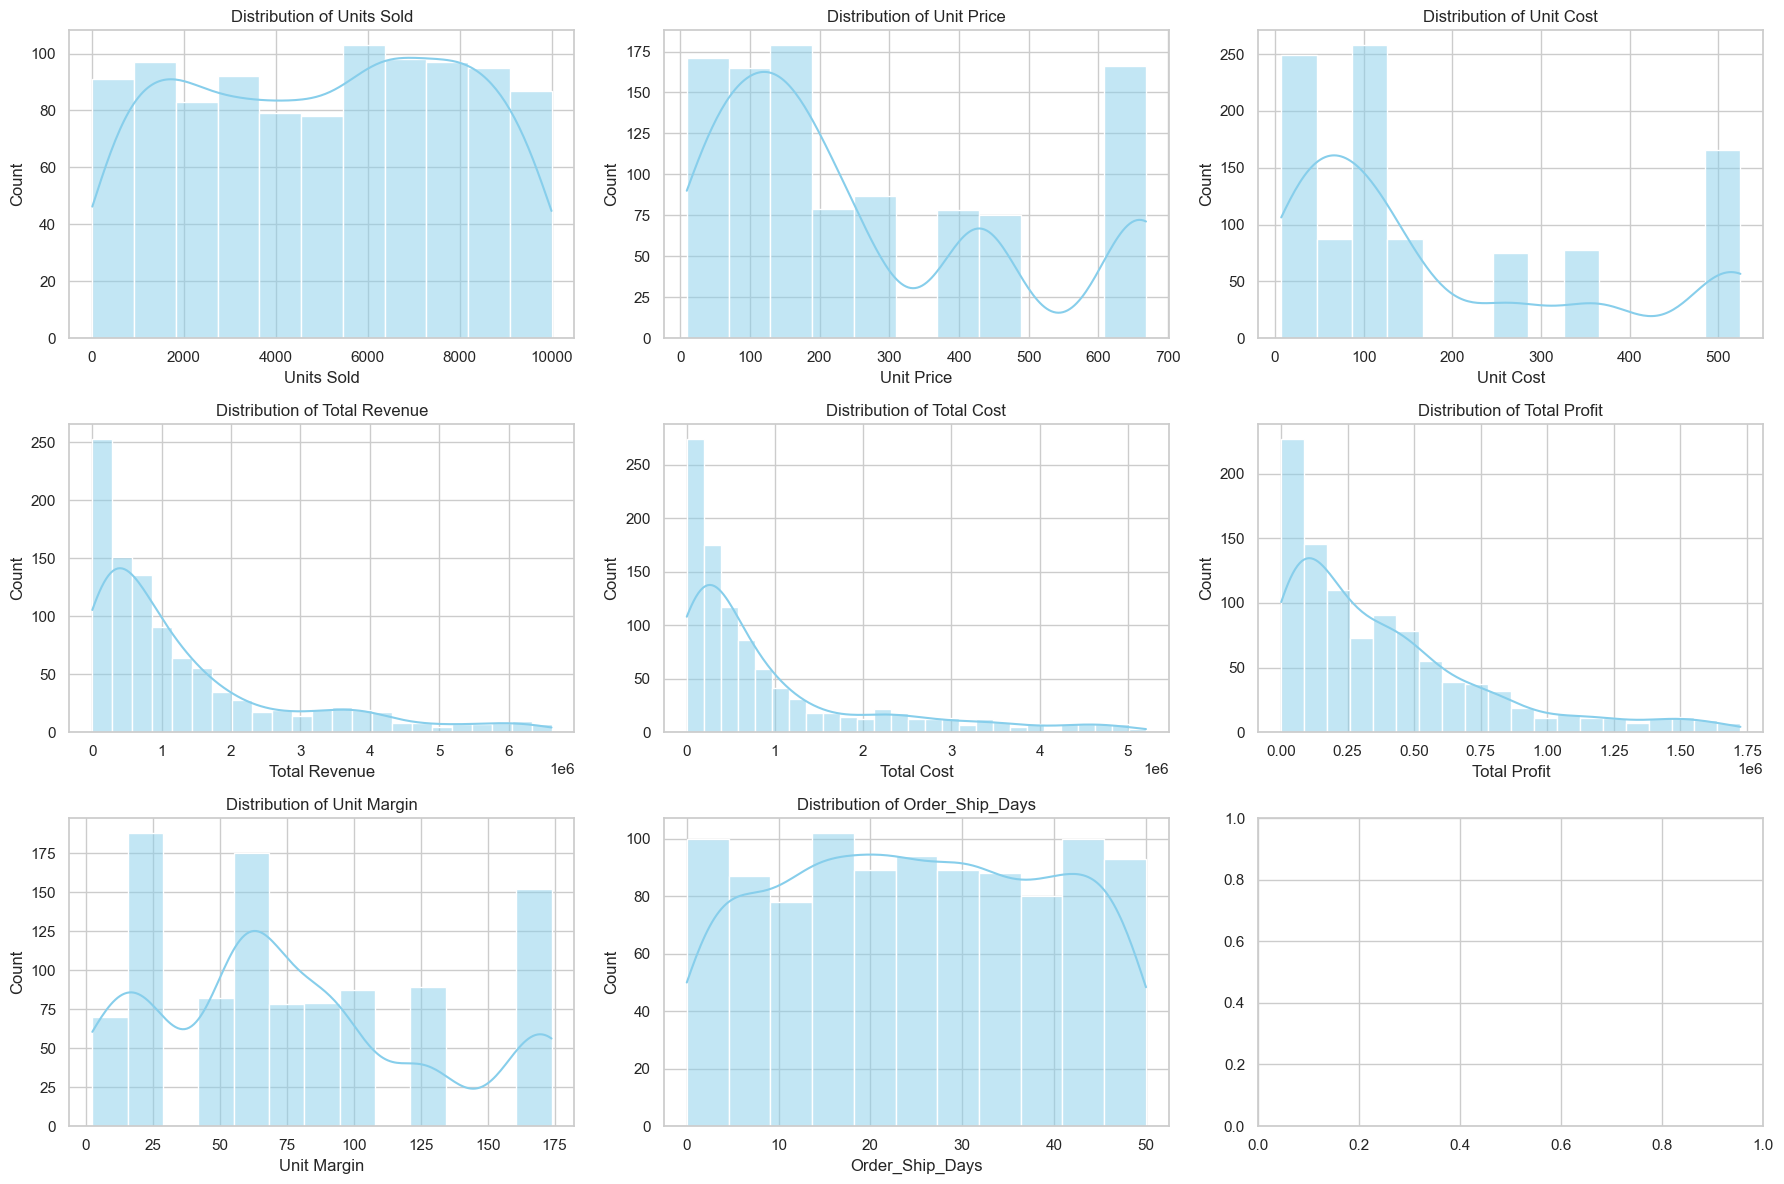

In [59]:
# 1. Distribution of numerical columns
num_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 
            'Total Cost', 'Total Profit', 'Unit Margin', 'Order_Ship_Days']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

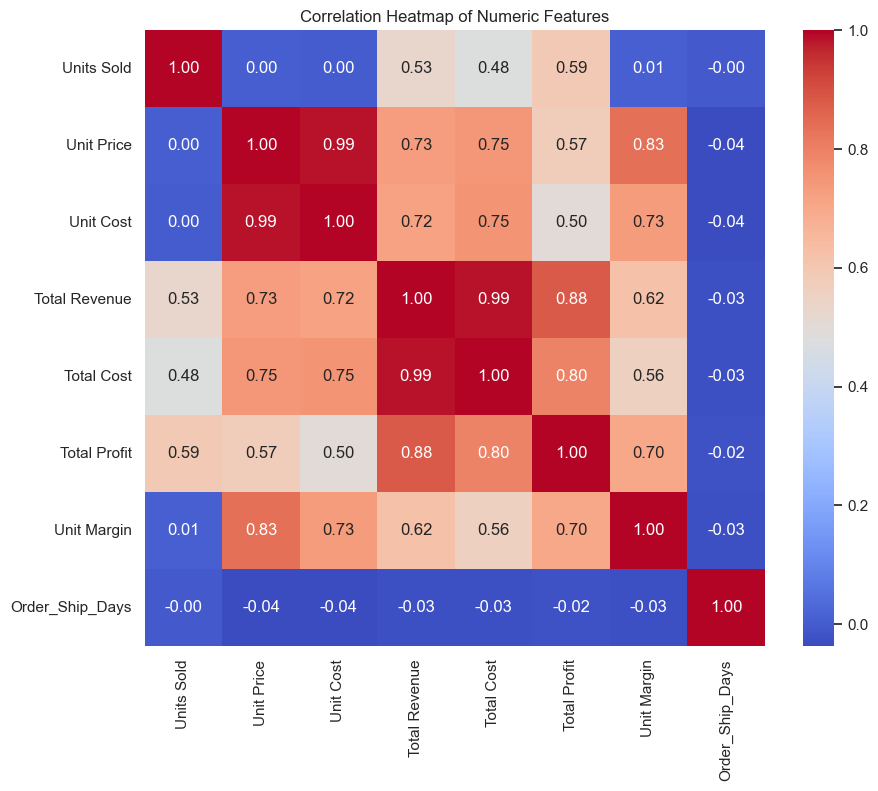

In [60]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1451509135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


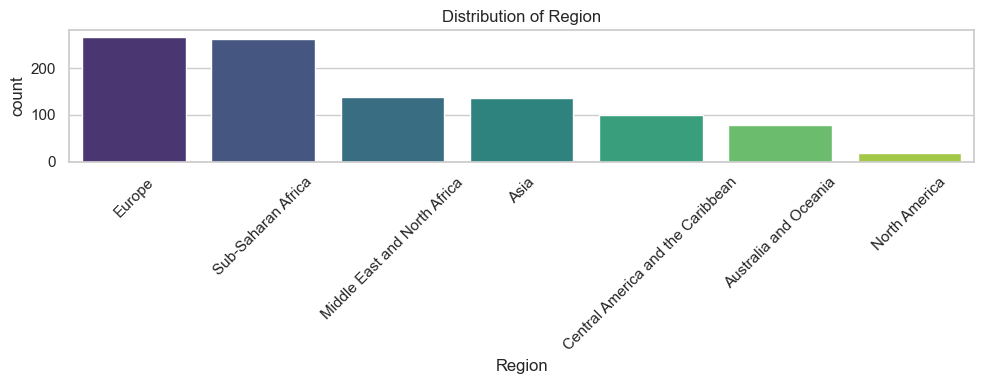

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1451509135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


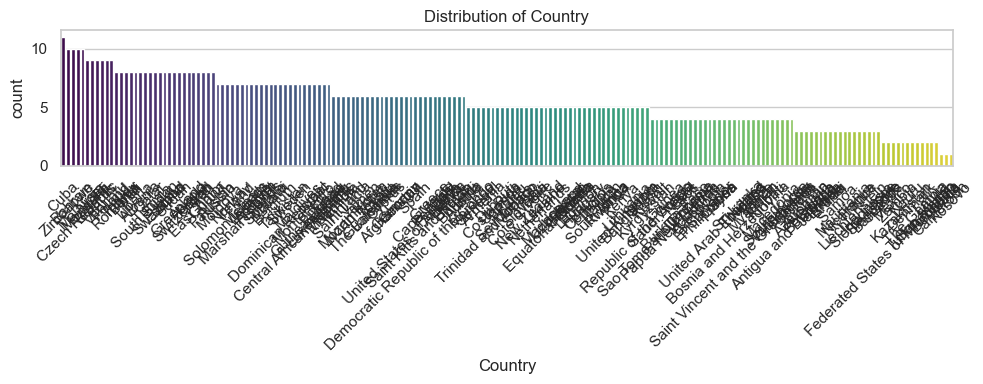

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1451509135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


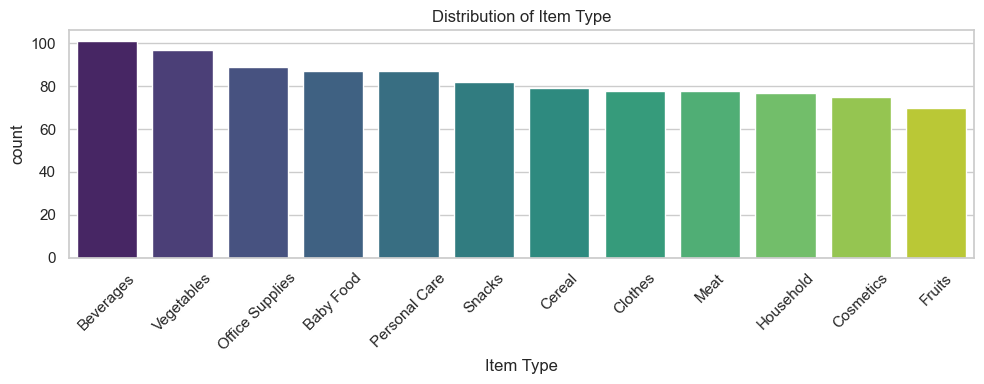

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1451509135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


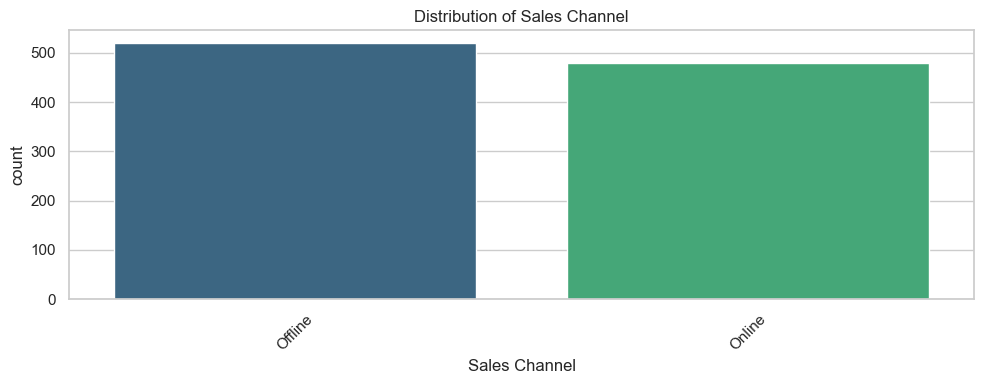

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1451509135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


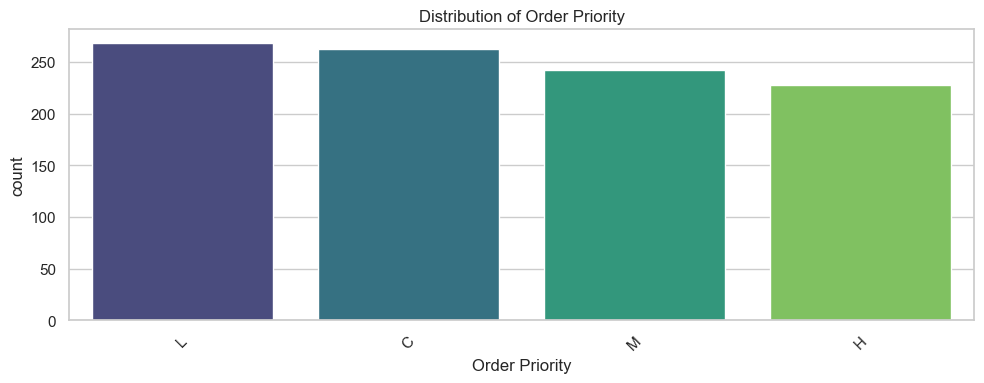

In [61]:
cat_cols = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [62]:
df = pd.read_excel(file_path)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
if 'Order_Ship_Days' not in df.columns:
    df['Order_Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Select numeric features for clustering
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
            'Total Cost', 'Total Profit', 'Unit Margin', 'Order_Ship_Days']

X = df[features]

# Normalize / Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


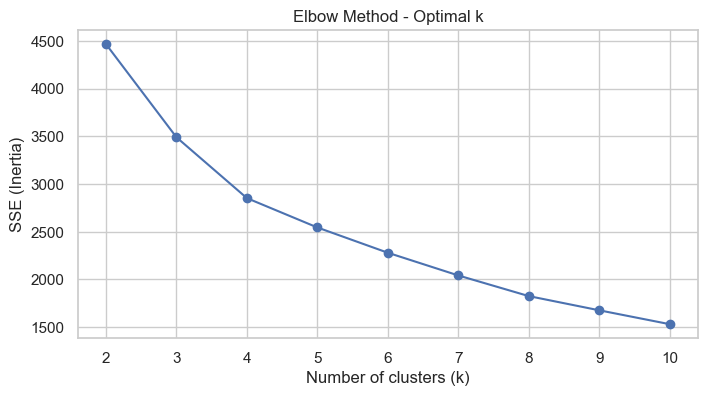

In [63]:
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


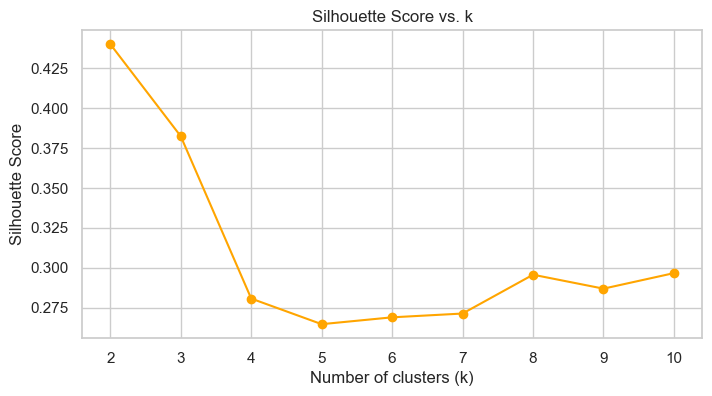

In [64]:
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [65]:
optimal_k = 4  # Replace with the elbow/silhouette result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


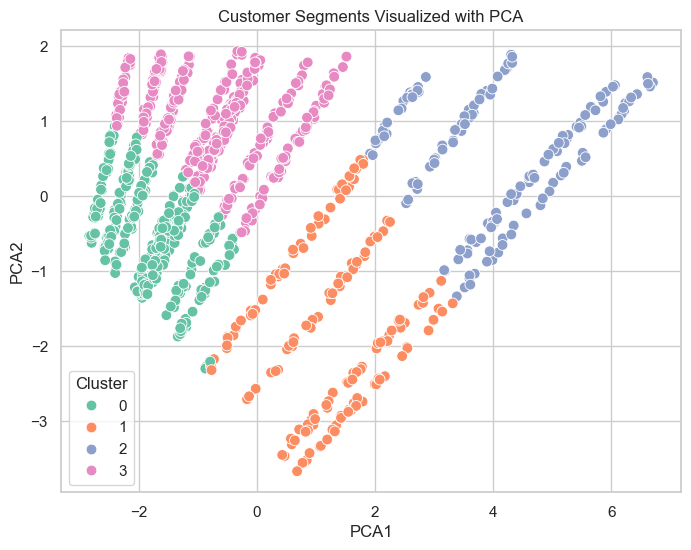

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments Visualized with PCA')
plt.show()

In [67]:
features_to_profile = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 
                       'Total Cost', 'Total Profit', 'Unit Margin', 'Order_Ship_Days']

cluster_summary = df.groupby('Cluster')[features_to_profile].mean().round(2)
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index()
cluster_summary

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Margin,Order_Ship_Days,Count
Cluster,,,,,,,,,
0,2372.92,119.32,71.43,251952.28,149185.63,102766.65,47.89,26.10,319
1,2878.85,535.97,412.48,1449391.47,1124905.03,324486.44,123.49,23.75,165
2,7774.85,565.64,426.89,4347078.57,3277884.61,1069193.96,138.75,24.57,151
3,7254.84,137.53,81.26,962713.99,569750.98,392963.01,56.26,24.78,365


C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


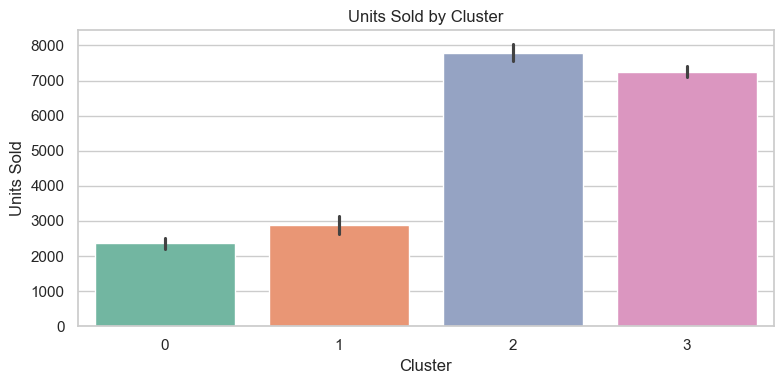

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


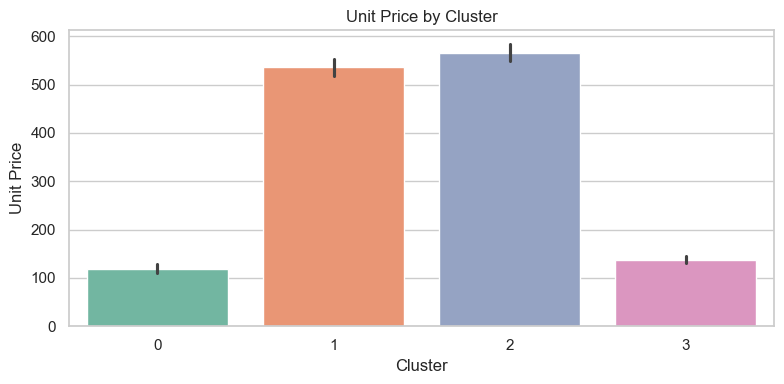

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


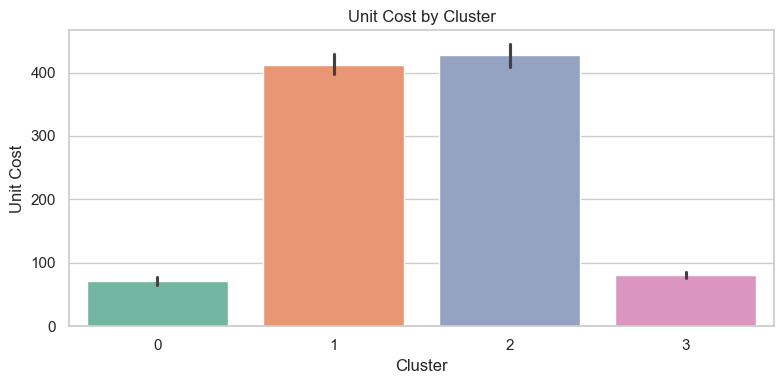

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


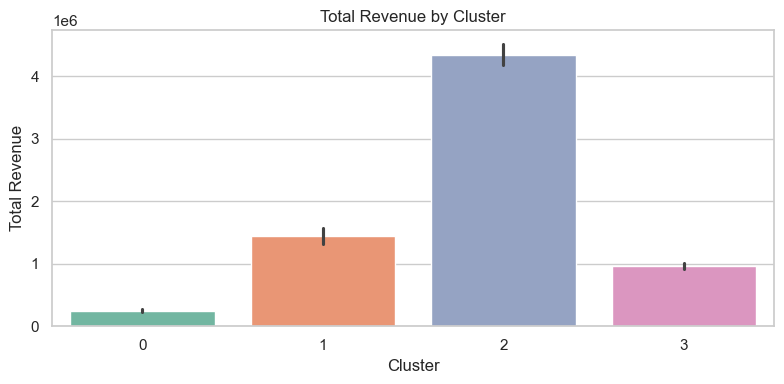

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


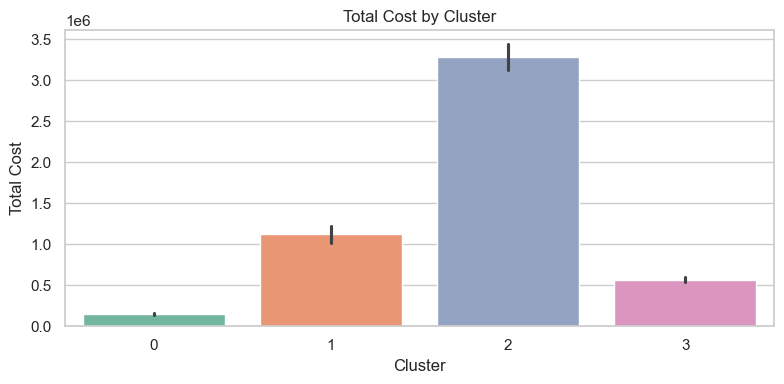

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


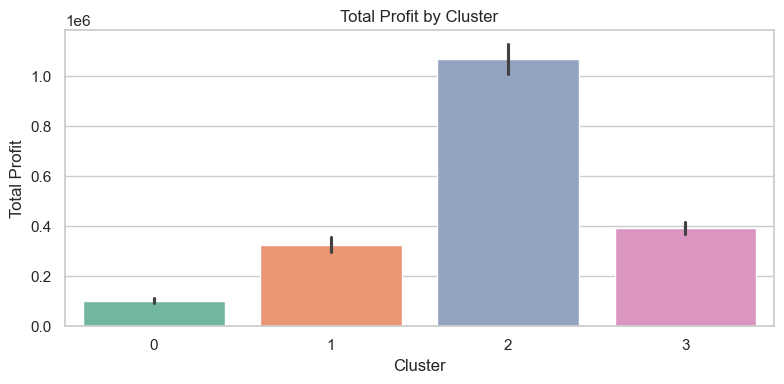

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


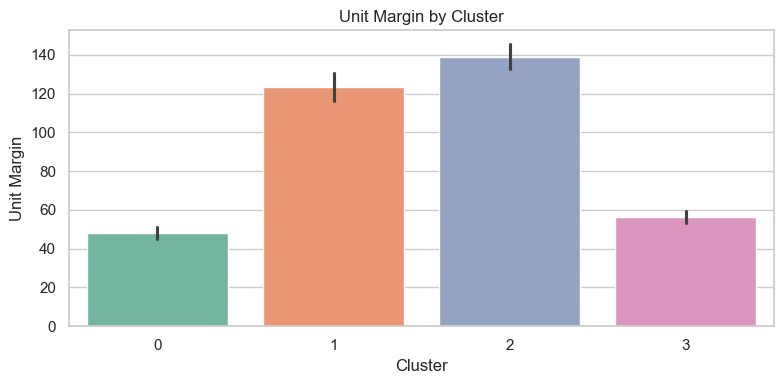

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_4356\1802994969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')


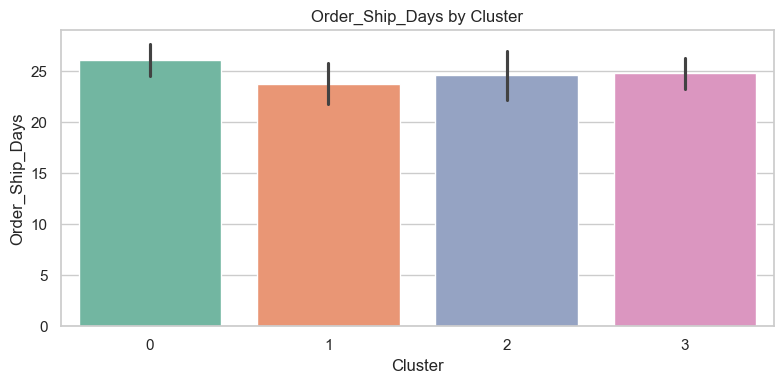

In [68]:
for feature in features_to_profile:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x='Cluster', y=feature, palette='Set2')
    plt.title(f'{feature} by Cluster')
    plt.tight_layout()
    plt.show()

In [69]:
def marketing_strategy(row):
    if row['Total Profit'] > 500000 and row['Units Sold'] > 5000:
        return "High Value - Loyalty Program & Upselling"
    elif row['Unit Margin'] > 100 and row['Units Sold'] < 3000:
        return "Premium Buyers - Focus on Quality & Exclusivity"
    elif row['Total Revenue'] < 200000:
        return "Low Engagement - Retargeting Campaigns"
    else:
        return "Moderate Value - Cross-Selling & Bundles"

cluster_summary['Suggested Strategy'] = cluster_summary.apply(marketing_strategy, axis=1)
cluster_summary


,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Margin,Order_Ship_Days,Count,Suggested Strategy
Cluster,,,,,,,,,,
0,2372.92,119.32,71.43,251952.28,149185.63,102766.65,47.89,26.10,319,Moderate Value - Cross-Selling & Bundles
1,2878.85,535.97,412.48,1449391.47,1124905.03,324486.44,123.49,23.75,165,Premium Buyers - Focus on Quality & Exclusivity
2,7774.85,565.64,426.89,4347078.57,3277884.61,1069193.96,138.75,24.57,151,High Value - Loyalty Program & Upselling
3,7254.84,137.53,81.26,962713.99,569750.98,392963.01,56.26,24.78,365,Moderate Value - Cross-Selling & Bundles
